                                                      MINI PROJECT

# 1. Import data sets and Load data set

In [2]:
import pandas as pd

#Importing Data
file_path=r'D:\Nandhini\MINI PROJECT\python\bank.csv'

data_frame=pd.read_csv(file_path)

#Loading Data
data_frame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# 2. Make the data proper to make use of data for analysis


### A. Identify the Features data types before entering into the analysis

In [2]:
Data_types_before_conversion=data_frame.dtypes
print("Data types before Conversion:")

# Display the data types before conversion
print(Data_types_before_conversion)

Data types before Conversion:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### B.	.Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.# Define data types for conversion

In [3]:
conversions = {
    'age': int,
    'job': 'category',
    'marital': 'category',
    'education': 'category',
    'default': bool,
    'balance': float,
    'housing': bool,
    'loan': bool,
    'contact': 'category',
    'day': int,
    'month': 'category',
    'duration': float,
    'campaign': int,
    'pdays': int,
    'previous': int,
    'poutcome': 'category',
    'y': bool
}

# User-defined function to convert column data types
def datatype_conversion(data_frame, column_name, new_data_type):
    data_frame[column_name] = data_frame[column_name].astype(new_data_type)

# Loop to apply conversions
for column_name, new_data_type in conversions.items():
    datatype_conversion(data_frame, column_name, new_data_type)

# Display the data types after conversion
data_types_after_conversion = data_frame.dtypes
print("Data Types After Conversion:")
print(data_types_after_conversion)

Data Types After Conversion:
age             int32
job          category
marital      category
education    category
default          bool
balance       float64
housing          bool
loan             bool
contact      category
day             int32
month        category
duration      float64
campaign        int32
pdays           int32
previous        int32
poutcome     category
y                bool
dtype: object


### C.	Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.


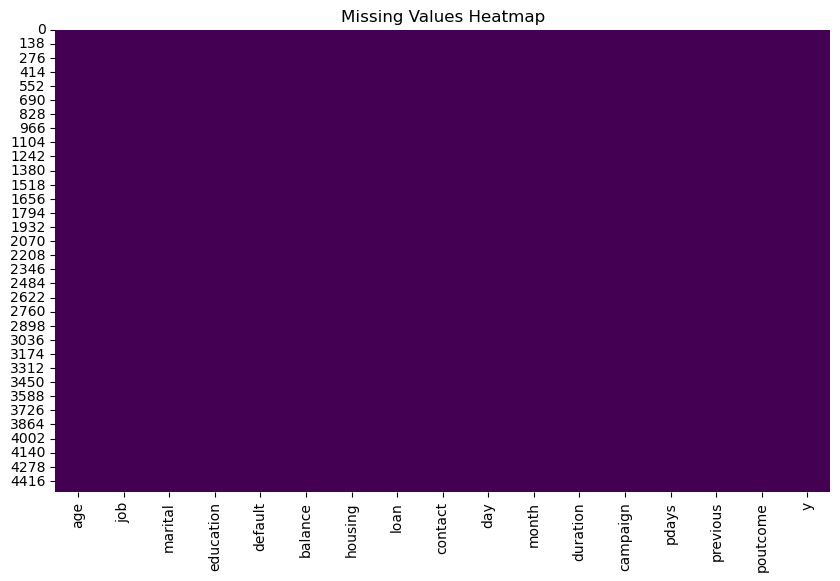

Shape after removing missing values: (4521, 17)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missing value counts
plt.figure(figsize=(10, 6))
sns.heatmap(data_frame.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# Remove rows with missing values
data_cleaned = data_frame.dropna()

print("Shape after removing missing values:", data_cleaned.shape)



### D. Find duplicates (if necessary)

In [5]:
duplicate_rows = data_frame[data_frame.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

#Empty dataframe indicates that there are no duplicate values

Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


# 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

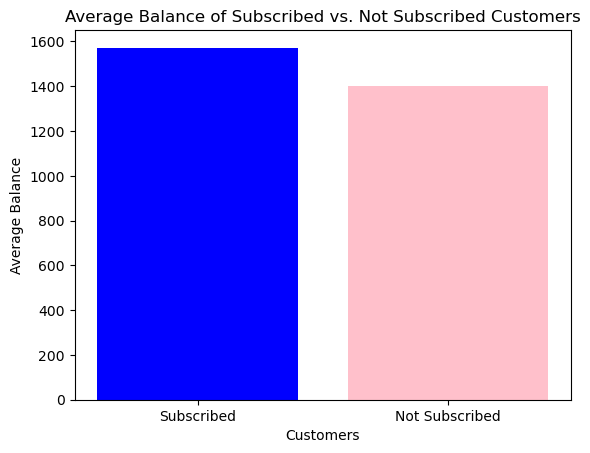

In [5]:
# Calculate average balance for subscribed and non-subscribed customers
avg_balance_subscribed = data_frame[data_frame['y']=='yes']['balance'].mean()
avg_balance_notsubscribed = data_frame[data_frame['y']=='no']['balance'].mean()

#bar plot creation to visualize  the avg balances
label=['Subscribed','Not Subscribed']
avg_balance=[avg_balance_subscribed,avg_balance_notsubscribed]

plt.bar(label,avg_balance,color=['blue','pink'])
plt.xlabel("Customers")
plt.ylabel("Average Balance")
plt.title("Average Balance of Subscribed vs. Not Subscribed Customers")
plt.show()

# 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

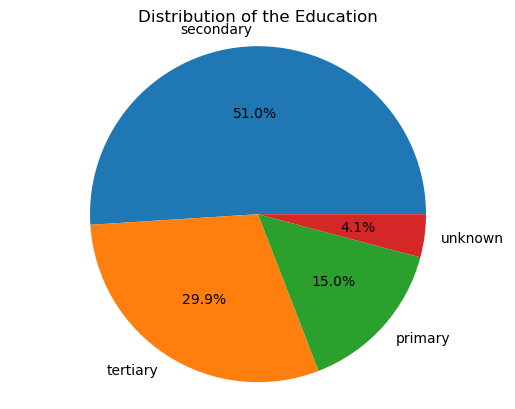

In [8]:
# Calculate the frequency of each education level
education_distribution=data_frame['education'].value_counts()


#create a pie plot
plt.pie(education_distribution,labels=education_distribution.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of the Education")
plt.show()

# 5. Create a function that should be able to create a new feature(Variable) called season using the month column

In [9]:
def create_season_column(df):
    month_to_season = {
        'jan': 'Winter',
        'feb': 'Winter',
        'mar': 'Spring',
        'apr': 'Spring',
        'may': 'Spring',
        'jun': 'Summer',
        'jul': 'Summer',
        'aug': 'Summer',
        'sep': 'Fall',
        'oct': 'Fall',
        'nov': 'Fall',
        'dec': 'Winter'
    }

    # Convert month abbreviations to lowercase and apply the mapping to create the 'season' column
    data_frame['season'] = data_frame['month'].str.lower().map(month_to_season)

create_season_column(data_frame)

data_frame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,True,1787.0,True,True,cellular,19,oct,79.0,1,-1,0,unknown,True,Fall
1,33,services,married,secondary,True,4789.0,True,True,cellular,11,may,220.0,1,339,4,failure,True,Spring
2,35,management,single,tertiary,True,1350.0,True,True,cellular,16,apr,185.0,1,330,1,failure,True,Spring
3,30,management,married,tertiary,True,1476.0,True,True,unknown,3,jun,199.0,4,-1,0,unknown,True,Summer
4,59,blue-collar,married,secondary,True,0.0,True,True,unknown,5,may,226.0,1,-1,0,unknown,True,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,True,-333.0,True,True,cellular,30,jul,329.0,5,-1,0,unknown,True,Summer
4517,57,self-employed,married,tertiary,True,-3313.0,True,True,unknown,9,may,153.0,1,-1,0,unknown,True,Spring
4518,57,technician,married,secondary,True,295.0,True,True,cellular,19,aug,151.0,11,-1,0,unknown,True,Summer
4519,28,blue-collar,married,secondary,True,1137.0,True,True,cellular,6,feb,129.0,4,211,3,other,True,Winter


# 6.Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

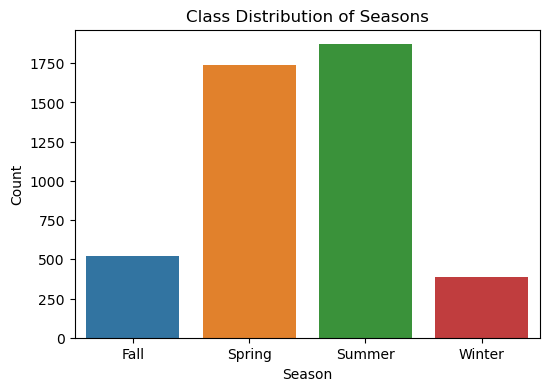

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data_frame, x='season')
plt.title('Class Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

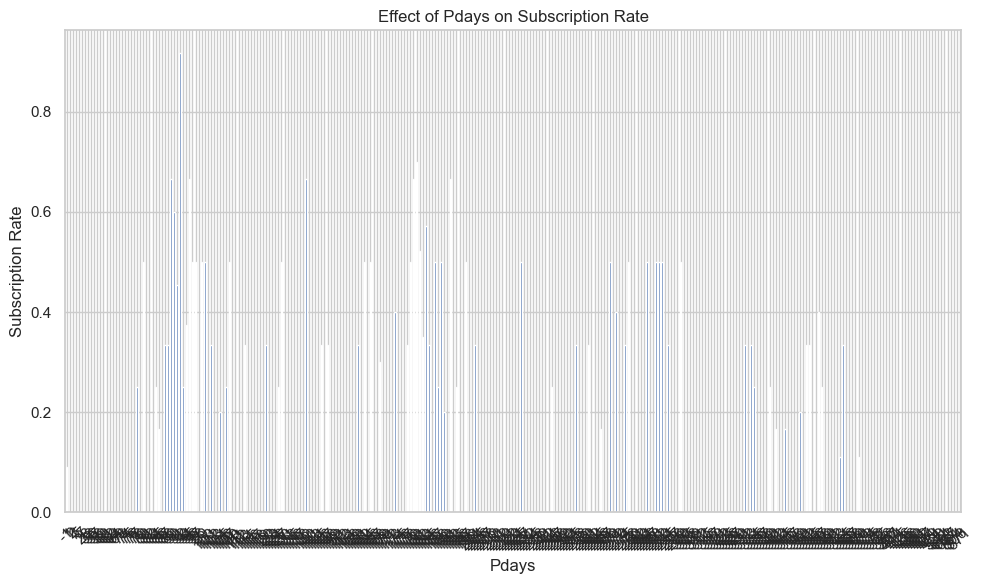

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame=pd.read_csv(file_path)

# Perform the analysis and create the plot (similar to the previous code)
pdays_subscriptions = data_frame.groupby(["pdays", "y"]).size().unstack()
pdays_subscriptions["subscription_rate"] = pdays_subscriptions["yes"] / (pdays_subscriptions["yes"] + pdays_subscriptions["no"])

# Create a bar plot
pdays_subscriptions["subscription_rate"].plot(kind="bar", figsize=(10, 6))
plt.xlabel("Pdays")
plt.ylabel("Subscription Rate")
plt.title("Effect of Pdays on Subscription Rate")
plt.xticks(rotation=45)
plt.tight_layout()

# 8. Replace the -1 as nan values for the P-days store.


In [3]:
import pandas as pd
import numpy as np


# Read the Excel file
data_frame = pd.read_csv(file_path)

# Replace -1 with NaN in the 'pdays' column
data_frame['pdays'] = data_frame['pdays'].replace(-1, np.nan)

# Print the updated data
print(data_frame)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

# 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

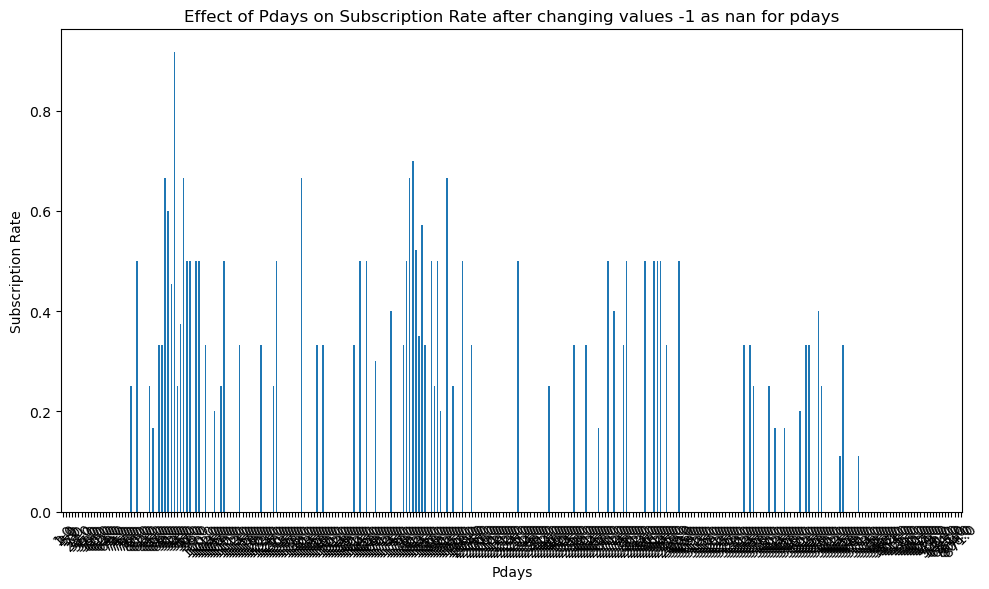

In [6]:
# Replace -1 with NaN in the 'pdays' column
data_frame['pdays'] = data_frame['pdays'].replace(-1, np.nan)

# Grouping data by pdays and y and calculating the subscription rate
pdays_subscriptions = data_frame.groupby(["pdays", "y"]).size().unstack()
pdays_subscriptions["subscription_rate"] = pdays_subscriptions["yes"] / (pdays_subscriptions["yes"] + pdays_subscriptions["no"])

# Creating a bar plot
pdays_subscriptions["subscription_rate"].plot(kind="bar", figsize=(10, 6))
plt.xlabel("Pdays")
plt.ylabel("Subscription Rate")
plt.title("Effect of Pdays on Subscription Rate after changing values -1 as nan for pdays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Does the customer take the term subscription who has less than 0 balance?Hint: Use any kind of plot which would you the related information to this question.

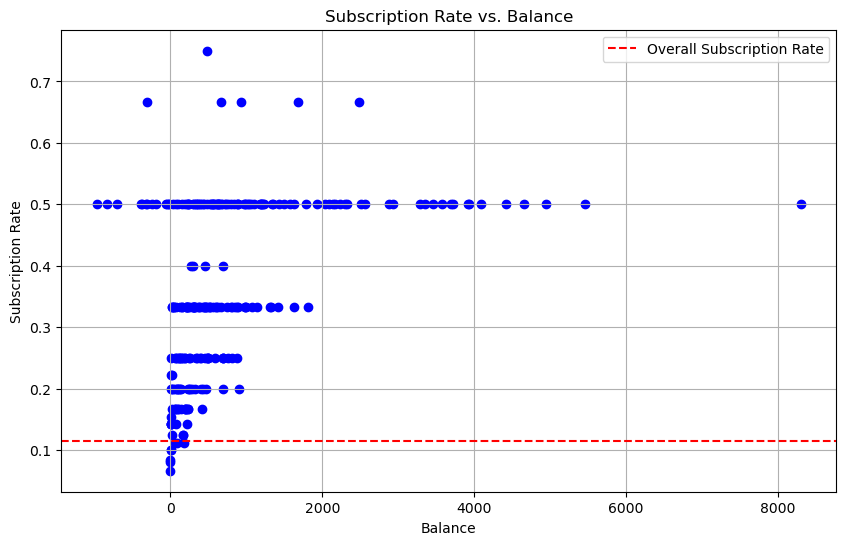

In [8]:
# Grouping data by balance and y and calculating the subscription rate
balance_subscriptions = data_frame.groupby(["balance", "y"]).size().unstack()
balance_subscriptions["subscription_rate"] = balance_subscriptions["yes"] / (balance_subscriptions["yes"] + balance_subscriptions["no"])

# Creating a scatter plot to visualize the relationship between balance and subscription rate
plt.figure(figsize=(10, 6))
plt.scatter(balance_subscriptions.index, balance_subscriptions["subscription_rate"], color='blue')
plt.axhline(y=data_frame['y'].value_counts(normalize=True)['yes'], color='red', linestyle='--', label='Overall Subscription Rate')
plt.xlabel("Balance")
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate vs. Balance")
plt.legend()
plt.grid()
plt.show()

# 11. Use Pivot table to find the maximum balance for each type of job.

In [9]:
# Creating a pivot table to find the maximum balance for each type of job
pivot_table_max_balance = data_frame.pivot_table(values='balance', index='job', aggfunc='max')

print(pivot_table_max_balance)

               balance
job                   
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337


# 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

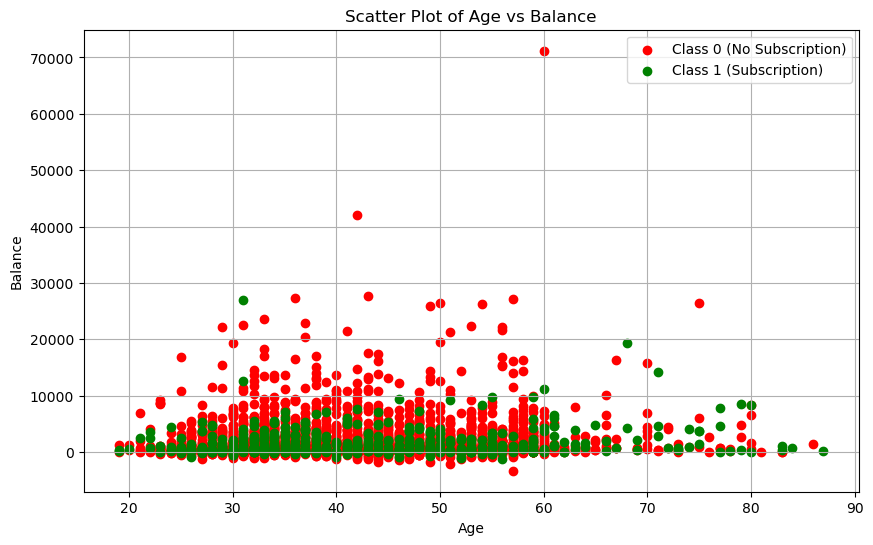

In [10]:
# Create scatter plot for Age vs Balance with points colored by subscription outcome
plt.figure(figsize=(10, 6))
plt.scatter(data_frame[data_frame['y'] == 'no']['age'], data_frame[data_frame['y'] == 'no']['balance'], color='red', label='Class 0 (No Subscription)')
plt.scatter(data_frame[data_frame['y'] == 'yes']['age'], data_frame[data_frame['y'] == 'yes']['balance'], color='green', label='Class 1 (Subscription)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs Balance')
plt.legend()
plt.grid()
plt.show()

# 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

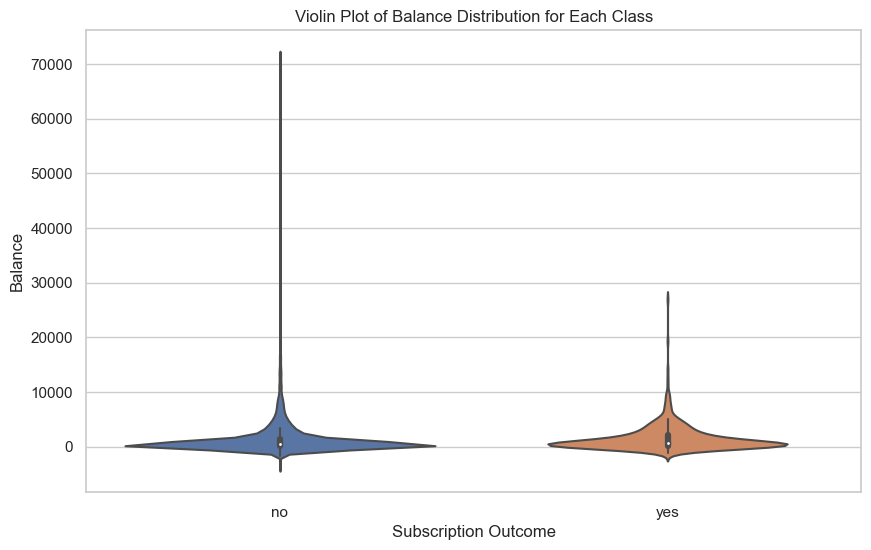

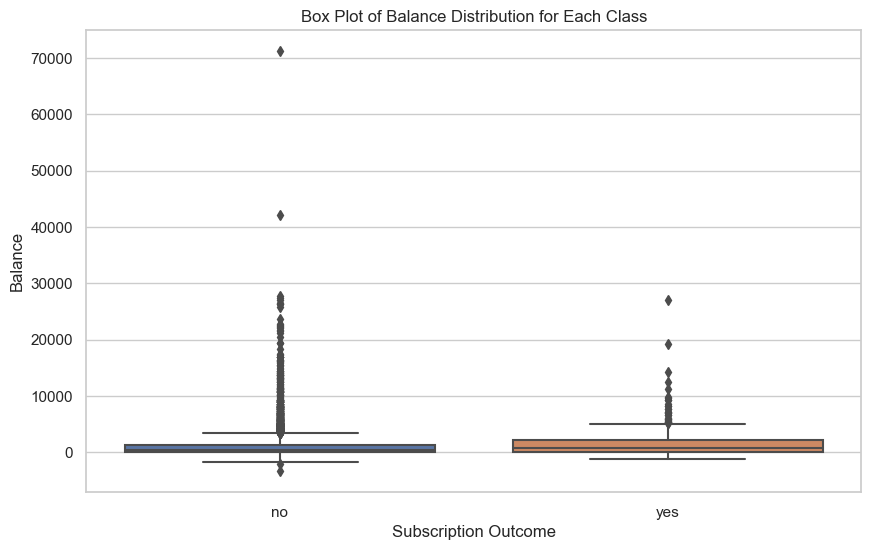

In [12]:
import seaborn as sns
# Set up the plotting style
sns.set(style="whitegrid")

# Create a violin plot for the distribution of balance for each class of Y
plt.figure(figsize=(10, 6))
sns.violinplot(x="y", y="balance", data=data_frame)
plt.xlabel('Subscription Outcome')
plt.ylabel('Balance')
plt.title('Violin Plot of Balance Distribution for Each Class')
plt.show()

# Create a box plot for the distribution of balance for each class of Y
plt.figure(figsize=(10, 6))
sns.boxplot(x="y", y="balance", data=data_frame)
plt.xlabel('Subscription Outcome')
plt.ylabel('Balance')
plt.title('Box Plot of Balance Distribution for Each Class')
plt.show()

# 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters. Note: Try to explore more parameters that are there in the pie-plot method.

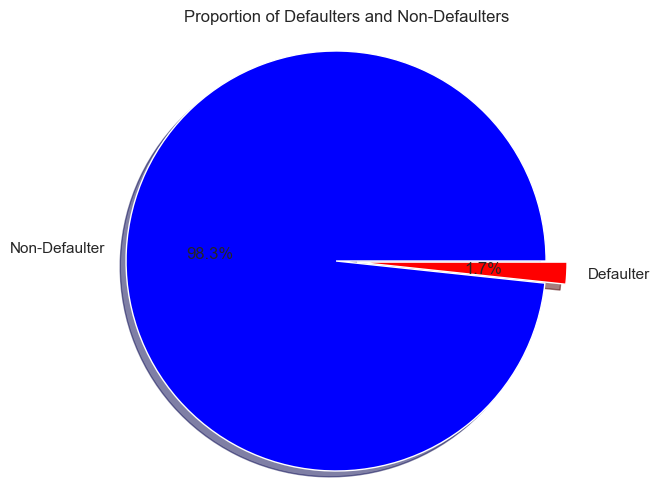

In [23]:
defaulters = data_frame['default'].value_counts()

# Create a pie plot to visualize the proportion of defaulters and non-defaulters
plt.figure(figsize=(6, 6))


labels = ['Non-Defaulter', 'Defaulter']
colors = ['blue', 'red']
autopct = '%1.1f%%'  # Display percentage with one decimal place

# Shadow: Set to True to add shadow to the plot.
shadow = True

plt.pie(defaulters, explode=explode, labels=labels, colors=colors, autopct=autopct, shadow=shadow)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title('Proportion of Defaulters and Non-Defaulters')
plt.show()

# 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

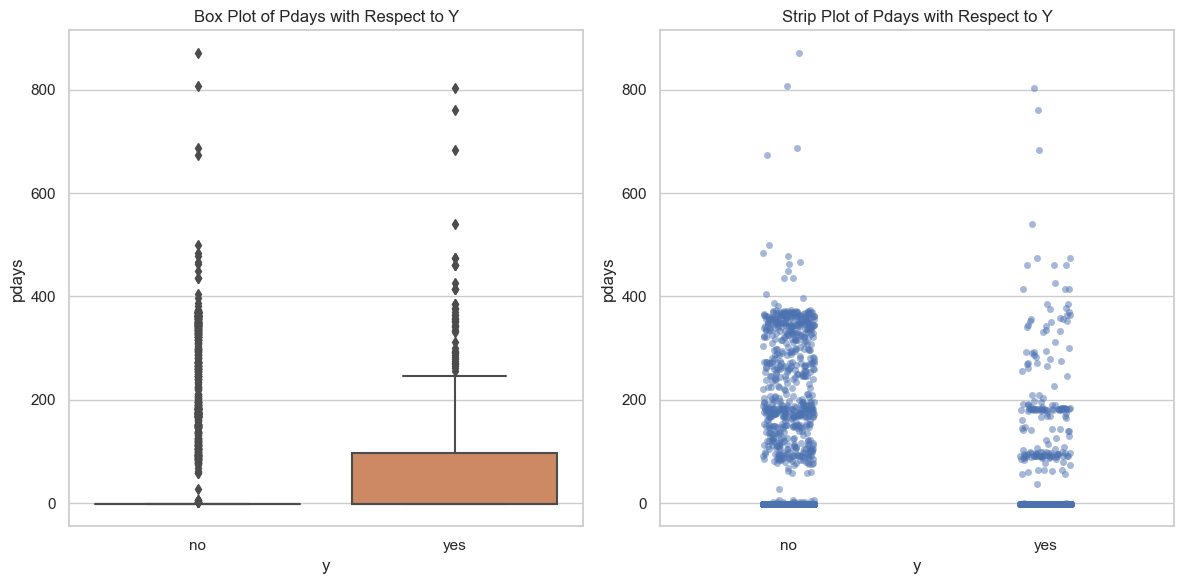

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
#12-breadth,6-height
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.boxplot(x="y", y="pdays", data=data_frame)
plt.title("Box Plot of Pdays with Respect to Y")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.stripplot(x="y", y="pdays", data=data_frame, jitter=True, alpha=0.5)
plt.title("Strip Plot of Pdays with Respect to Y")

plt.tight_layout()
plt.show()
